In [1]:
import numpy as np # for mathematical caluclations 
import pandas as pd
from datetime import datetime # to access datetime

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px # for interactive plotting 
import plotly.graph_objects as go # for interactive plotting

# clustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn import cluster
from mpl_toolkits.mplot3d import axes3d

# set the plot style in matplotlib to ggplot and the firgure size to 15x5## Augmented Dickey Fuller Test for Assessing Stati
plt.style.use('ggplot') 
plt.rcParams["figure.figsize"] = (15,5)

# Explorative Data Analysis

In [2]:
spotify = pd.read_csv('spotify.csv',index_col = 'Unnamed: 0')
spotify.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [3]:
spotify.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [4]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           11

In [5]:
null_values = spotify[spotify['artists'].isnull()]
null_values

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,7,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


The null value is off track_id, artists, album_name and track_name, which do not affect the usage of song attribute columns. Therefore we do not drop this row

## Cleaning

In [6]:
#only include songs where speechiness below 0.66 (remove speeches, podcasts etc)
spotify = spotify[spotify['speechiness'] <= 0.66]
spotify.shape

(113120, 20)

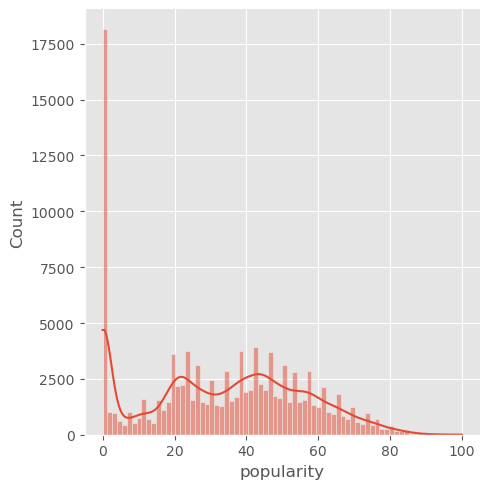

In [7]:
sns.displot(spotify.popularity, kde = True)

## Understanding popularity by genre

In [8]:
#sorting by mean popularity
spotify.groupby(['track_genre'])['popularity'].aggregate(['mean','median'])\
    .sort_values(by = 'mean',ascending = False).head(5)

,mean,median
track_genre,,
pop-film,59.283000,60.0
k-pop,56.886774,60.0
chill,53.673695,57.0
sad,52.368104,54.0
grunge,49.594000,55.0


In [9]:
#sorting by median popularity
spotify.groupby(['track_genre'])['popularity'].aggregate(['mean','median'])\
    .sort_values(by = 'median',ascending = False).head(5)

,mean,median
track_genre,,
pop,47.576000,66.0
pop-film,59.283000,60.0
k-pop,56.886774,60.0
hip-hop,37.759000,58.0
chill,53.673695,57.0


<Axes: xlabel='track_genre', ylabel='popularity'>

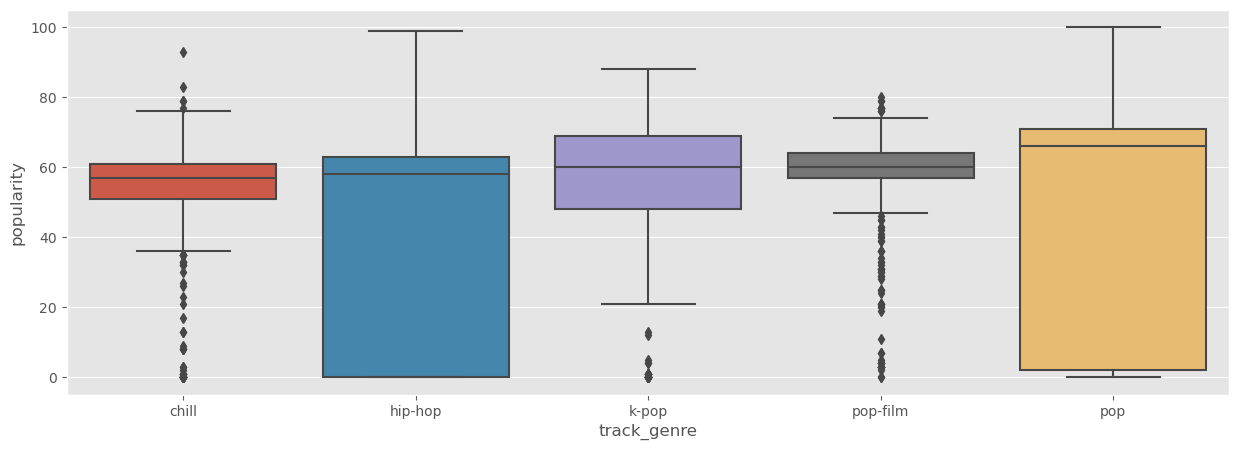

In [10]:
#box-plot for top genres
desired_genre = ['pop-film','k-pop','chill','pop','hip-hop'] 
top_genre = spotify[spotify['track_genre'].isin(desired_genre)]
top_genre = pd.get_dummies(top_genre, columns=['explicit'])
sns.boxplot(data = top_genre, x = 'track_genre', y = 'popularity')

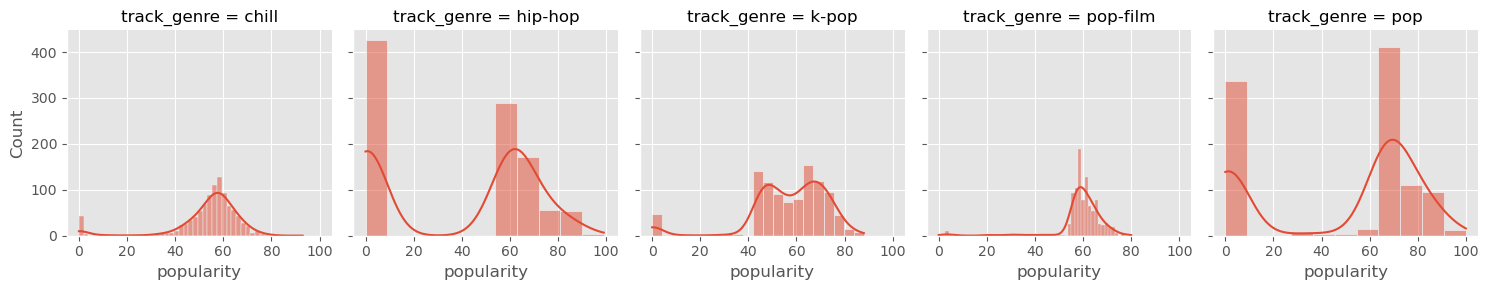

In [11]:
#facet grid
g = sns.FacetGrid(top_genre,col='track_genre')
g.map(sns.histplot, 'popularity',kde=True)

- Chill, k-pop and pop-film genres are pretty normally distributed -> safe choice to invest in. 
- Hip-hop and pop have higher risks -> higher return -> either like it or not like it

<Axes: >

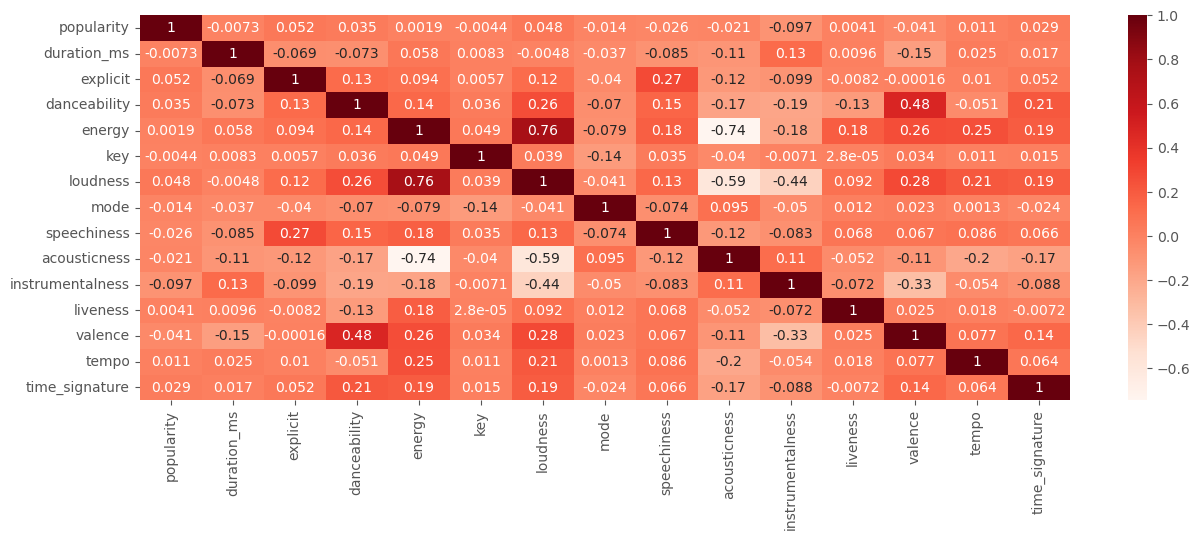

In [12]:
#heatmap
cor_matrix = spotify.corr(numeric_only=True) 
sns.heatmap(cor_matrix, annot = True, cmap = 'Reds')

## Data split to genre

In [24]:
top_genre

,track_id,artists,album_name,track_name,popularity,duration_ms,danceability,energy,key,loudness,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,explicit_False,explicit_True
15000,47isJpIIO8m7BJEhiFhnaf,dhruv,double take,double take,75,171743,0.456,0.437,8,-11.156,...,0.0867,0.839,0.000000,0.2180,0.2090,108.678,4,chill,1,0
15001,5e2l2ZAMwHmrkdM4Z6NhAR,Shiloh Dynasty;Timmies,Vivid Pictures,Again,74,157205,0.603,0.204,7,-12.727,...,0.1120,0.479,0.071400,0.6420,0.7100,74.688,5,chill,1,0
15002,3XV5r1cMB2AlD2ir0v6mfm,yaeow;Neptune,The Way I Love You,The Way I Love You,60,162726,0.543,0.206,6,-18.037,...,0.0319,0.940,0.453000,0.3850,0.1300,113.107,3,chill,1,0
15003,5HsSsEeP3hU9QSfHZrzbtA,Finding Hope,Our Love,3:00 AM,68,201951,0.550,0.147,0,-18.675,...,0.0404,0.563,0.001020,0.2860,0.0346,81.991,4,chill,1,0
15004,22I3h5AOENlH4CqXJsEbFR,Justine Skye;Tyga,Collide (feat. Tyga),Collide (feat. Tyga),75,260169,0.418,0.310,11,-9.869,...,0.0625,0.095,0.000000,0.2160,0.1310,139.614,4,chill,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81995,6mmGbsCqf5e8vxv1WodYIG,G. V. Prakash,Aadukalam (Original Motion Picture Soundtrack),Yathe Yathe,64,344360,0.448,0.607,9,-4.606,...,0.0611,0.791,0.000000,0.0888,0.4840,139.509,4,pop,1,0
81996,2WO5nzB7QtKn9ZRc9Jkalt,Harris Jayaraj;Sudha Ragunathan,Vaaranam Aayiram (Original Motion Picture Soun...,Annul Maelae,64,322506,0.773,0.436,4,-10.972,...,0.0321,0.672,0.006780,0.1970,0.5330,115.917,4,pop,1,0
81997,5OCFWPgrCCNBukB3YrDD90,Raj Barman,Tu Mile Dil Khile - Raj Barman,Tu Mile Dil Khile,62,197716,0.639,0.368,2,-14.096,...,0.0480,0.245,0.000000,0.1060,0.4150,89.940,4,pop,1,0
81998,13wIQbwSuQ4YFvDvtQgSVc,Harris Jayaraj;Unnikrishnan;Chinmayi;Mega,Aadhavan (Original Motion Picture Soundtrack),Vaarayo Vaarayo,64,316680,0.718,0.361,5,-9.740,...,0.0298,0.565,0.119000,0.1510,0.4460,103.000,4,pop,1,0


In [14]:
pop = top_genre[top_genre['track_genre'] == 'pop']
pop_film = top_genre[top_genre['track_genre'] == 'pop-film']
kpop = top_genre[top_genre['track_genre'] == 'k-pop']
hiphop = top_genre[top_genre['track_genre'] == 'hip-hop']
chill = top_genre[top_genre['track_genre'] == 'chill']

In [15]:
needed_col = ['popularity', 'explicit_False', 'explicit_True', 'danceability', 'tempo', 'instrumentalness', 'loudness', 'valence']

### Pop

In [16]:
pop = pop[needed_col]
pop.head()

,popularity,explicit_False,explicit_True,danceability,tempo,instrumentalness,loudness,valence
81000,91,1,0,0.514,171.005,0.000095,-5.934,0.334
81001,74,1,0,0.535,191.827,0.000000,-7.862,0.373
81002,83,1,0,0.860,114.984,0.163000,-6.510,0.952
81003,96,0,1,0.733,116.992,0.000001,-5.529,0.310
81004,90,0,1,0.679,186.003,0.000006,-7.015,0.486


### Pop-film

In [17]:
pop_film = pop_film[needed_col]
pop_film.head()

,popularity,explicit_False,explicit_True,danceability,tempo,instrumentalness,loudness,valence
80000,74,1,0,0.535,191.827,0.000000,-7.862,0.373
80001,71,1,0,0.481,91.796,0.000000,-8.200,0.257
80002,73,1,0,0.662,79.972,0.000017,-11.200,0.617
80003,71,1,0,0.528,94.058,0.000000,-6.250,0.317
80004,71,1,0,0.827,119.936,0.000000,-5.531,0.774


### Kpop

In [18]:
kpop = kpop[needed_col]
kpop.head()

,popularity,explicit_False,explicit_True,danceability,tempo,instrumentalness,loudness,valence
65000,73,1,0,0.562,122.925,0.000268,-8.744,0.415
65001,78,1,0,0.826,140.037,0.000041,-10.121,0.400
65002,83,1,0,0.738,95.035,0.000000,-5.235,0.740
65003,73,1,0,0.752,95.043,0.000000,-5.165,0.388
65004,80,1,0,0.645,119.947,0.000000,-4.761,0.803


<Axes: >

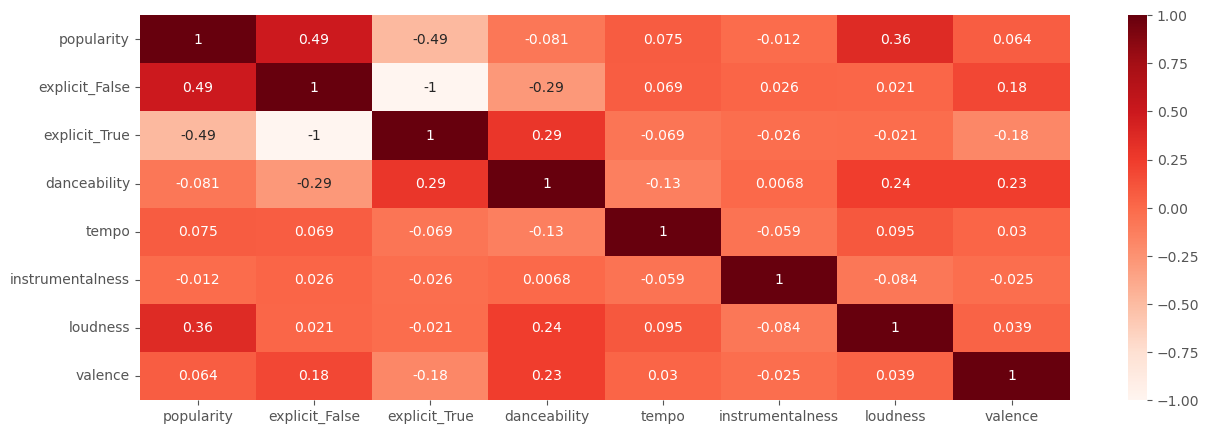

In [21]:
#heatmap
cor_matrix_kpop = kpop.corr(numeric_only=True) 
sns.heatmap(cor_matrix_kpop, annot = True, cmap = 'Reds')

<Axes: xlabel='danceability', ylabel='popularity'>

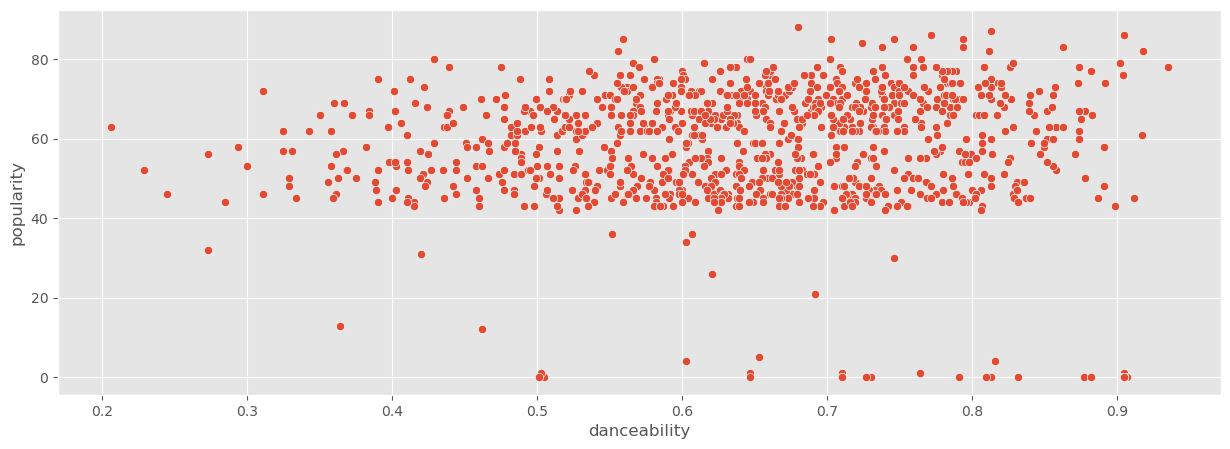

In [22]:
sns.scatterplot(data = kpop, 
                    x = 'danceability', 
                    y = 'popularity')

<Axes: xlabel='tempo', ylabel='popularity'>

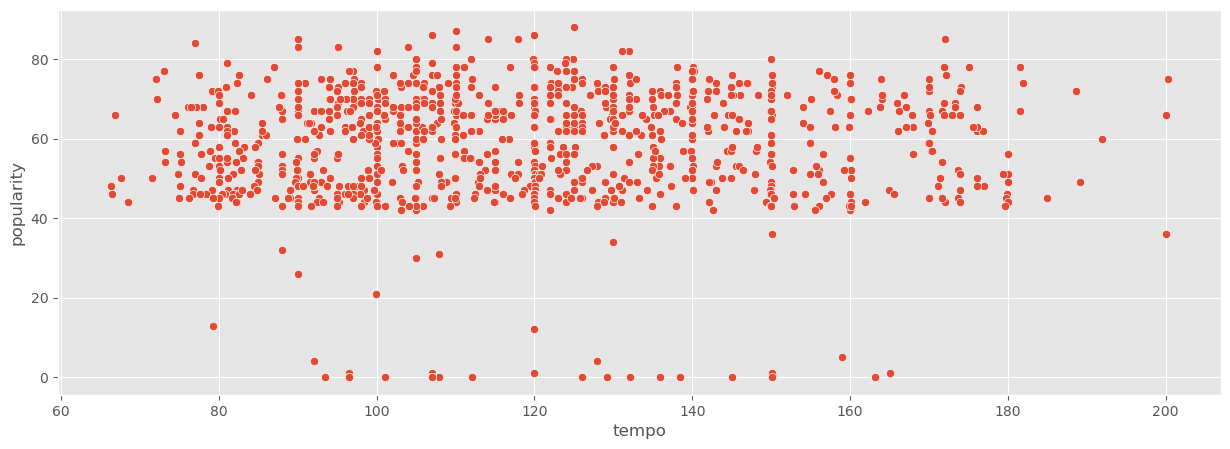

In [23]:
sns.scatterplot(data = kpop, 
                    x = 'tempo', 
                    y = 'popularity')

# LINEAR REGRESSION - Failed

In [26]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

x = kpop.drop(columns = ['popularity'])
y = kpop['popularity']
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.360
Method:                 Least Squares   F-statistic:                     94.28
Date:                Thu, 30 Nov 2023   Prob (F-statistic):           1.09e-93
Time:                        18:26:23   Log-Likelihood:                -4015.5
No. Observations:                 998   AIC:                             8045.
Df Residuals:                     991   BIC:                             8079.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               37.3459      2.576  

### Hiphop

In [19]:
hiphop = hiphop[needed_col]
hiphop.head()

,popularity,explicit_False,explicit_True,danceability,tempo,instrumentalness,loudness,valence
51000,83,1,0,0.860,114.984,0.163000,-6.510,0.952
51001,83,1,0,0.768,137.034,0.000000,-8.936,0.722
51002,82,1,0,0.711,180.219,0.016300,-10.048,0.674
51003,77,1,0,0.796,98.967,0.000025,-7.030,0.304
51004,89,0,1,0.591,169.928,0.000000,-5.484,0.478


### Chill

In [20]:
chill = chill[needed_col]
chill.head()

,popularity,explicit_False,explicit_True,danceability,tempo,instrumentalness,loudness,valence
15000,75,1,0,0.456,108.678,0.00000,-11.156,0.2090
15001,74,1,0,0.603,74.688,0.07140,-12.727,0.7100
15002,60,1,0,0.543,113.107,0.45300,-18.037,0.1300
15003,68,1,0,0.550,81.991,0.00102,-18.675,0.0346
15004,75,0,1,0.418,139.614,0.00000,-9.869,0.1310


                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.360
Method:                 Least Squares   F-statistic:                     94.28
Date:                Thu, 30 Nov 2023   Prob (F-statistic):           1.09e-93
Time:                        18:24:13   Log-Likelihood:                -4015.5
No. Observations:                 998   AIC:                             8045.
Df Residuals:                     991   BIC:                             8079.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               37.3459      2.576  